In [ ]:
!unzip "/content/drive/MyDrive/COVID_19/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

#data exploration

In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt 


In [ ]:
covid_imgs = pd.read_excel('/content/COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

covid_imgs.to_csv('/content/COVID-19_Radiography_Dataset/COVID.metadata.csv', index=False)

In [ ]:
covid_imgs = pd.read_csv('/content/COVID-19_Radiography_Dataset/COVID.metadata.csv')
covid_imgs.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [ ]:
normal_images = pd.read_excel('/content/COVID-19_Radiography_Dataset/Normal.metadata.xlsx')

normal_images.to_csv('/content/COVID-19_Radiography_Dataset/Normal.metadata.csv', index=False)

In [ ]:
normal_images = pd.read_csv('/content/COVID-19_Radiography_Dataset/Normal.metadata.csv')
normal_images.head()

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [ ]:
ROOT_DIR = "/content/COVID-19_Radiography_Dataset"
imgs = ['COVID','Normal']

NEW_DIR = "/content/all_images/"

# Copy all my images to a new folder i.e all_images

In [ ]:
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")
  
    for imgfile in glob.iglob(os.path.join(org_dir, "images/*.png")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Already Exist")

# number of Images in each categories

In [ ]:
counter = {'COVID':0,'Normal':0 }

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

# the number of images i have in each class
counter

{'COVID': 3616, 'Normal': 10192}

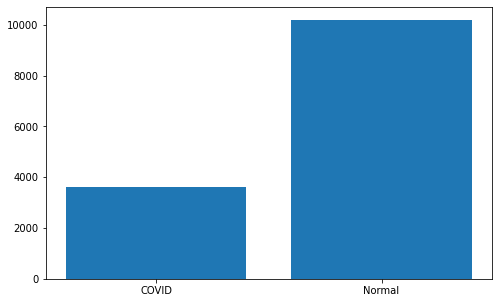

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(x = counter.keys(), height= counter.values())
plt.show()

In [ ]:
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")

  # Train Data
  for i in np.random.choice(replace= False , size= 7000 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 2520 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  # Validation Data
  for i in np.random.choice(replace= False , size= 540 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 1500 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  # Test Data
  for i in np.random.choice(replace= False , size= 540 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 1500 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)


In [ ]:
train_path  = "/content/all_images/train_test_split/train"
valid_path  =  "/content/all_images/train_test_split/validation" 
test_path   = "/content/all_images/train_test_split/test"

In [ ]:
 import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

train = train_data_gen.flow_from_directory(directory= train_path, 
                                           target_size=(224,224))
 

Found 9520 images belonging to 2 classes.


In [ ]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input  )

valid = validation_data_gen.flow_from_directory(directory= valid_path, 
                                                target_size=(224,224))

Found 2040 images belonging to 2 classes.


In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path , 
                                          target_size=(224,224), 
                                          shuffle= False)


Found 2040 images belonging to 2 classes.


In [ ]:
# Covid +ve X-Ray is represented by 0 and Normal is represented by 1

class_type = {0:'Covid',  1 : 'Normal'}

In [ ]:
# to visualize the images in the traning data denerator 

t_img , label = train.next()

In [ ]:
# function when called will prot the images 

def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

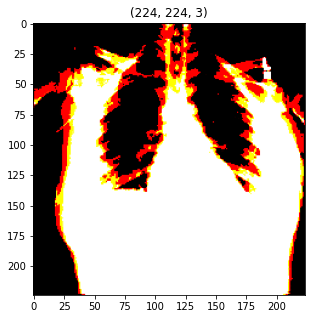

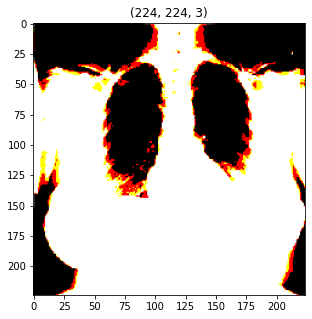

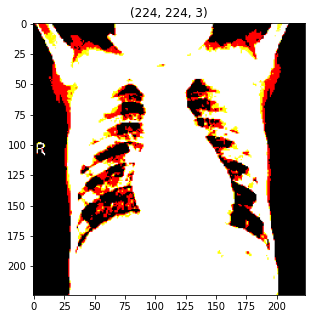

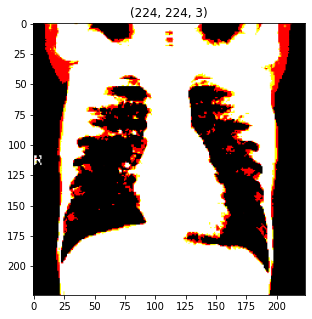

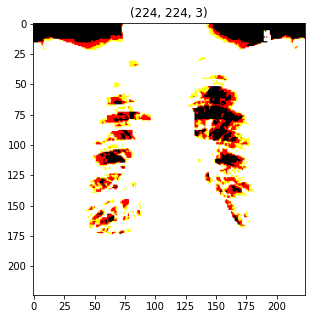

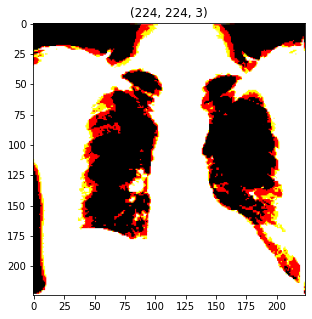

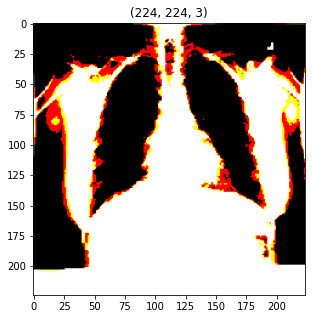

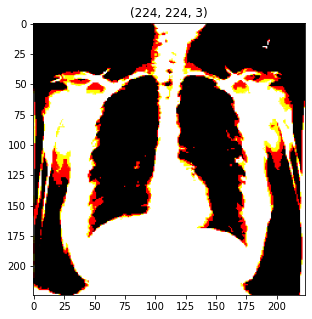

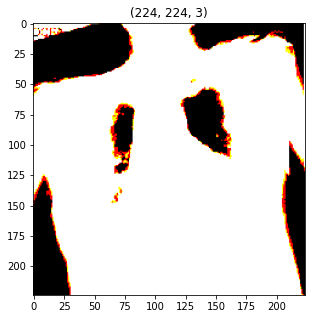

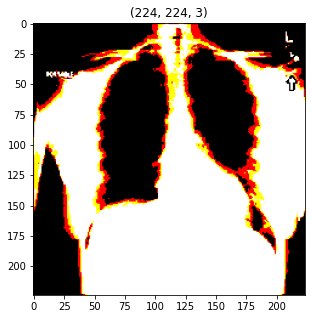

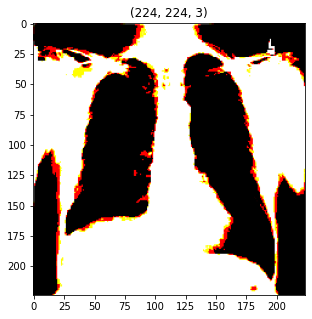

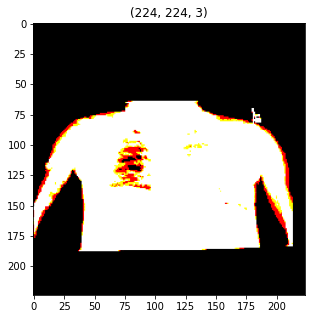

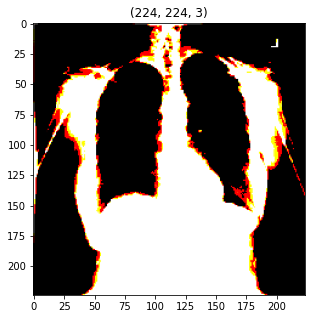

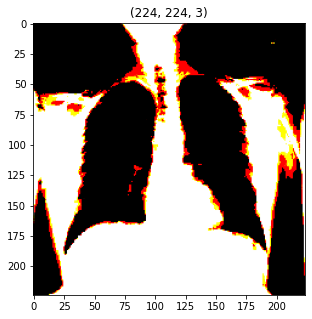

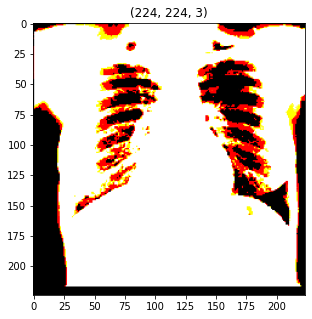

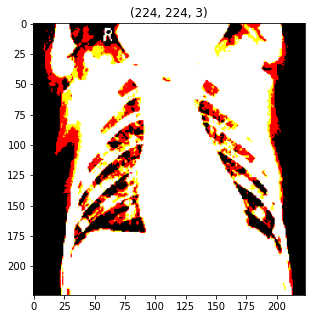

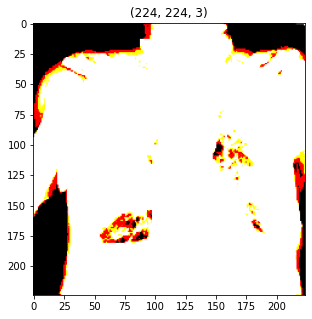

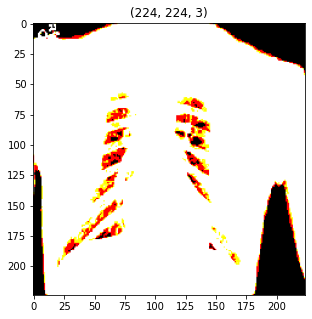

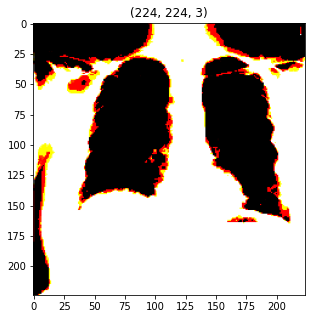

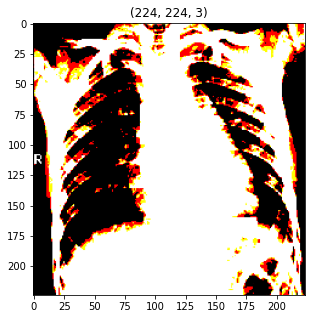

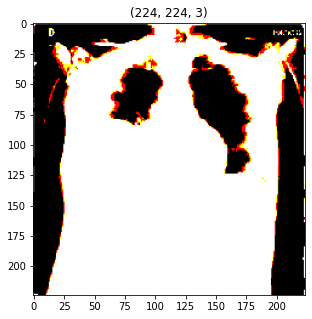

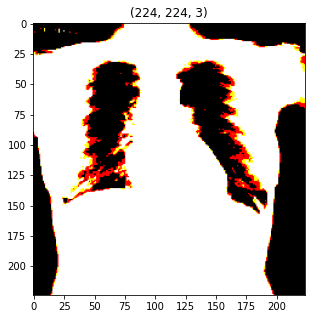

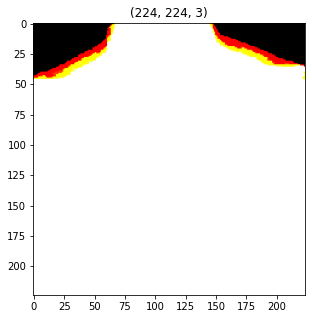

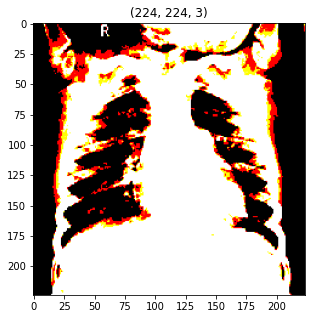

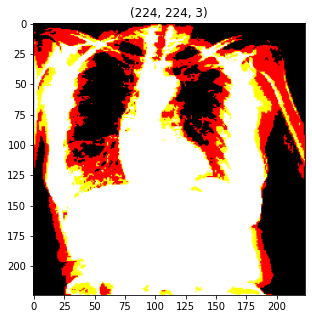

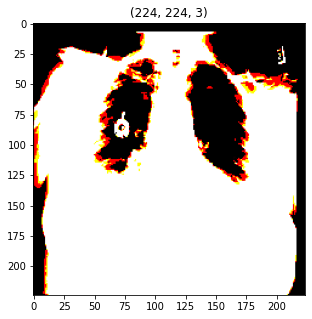

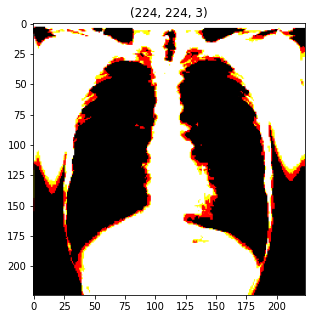

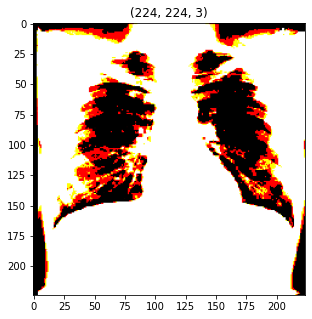

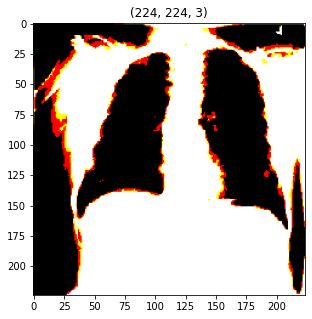

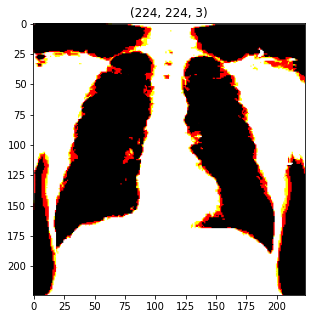

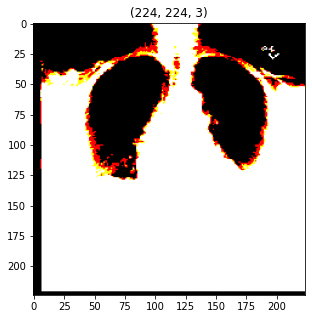

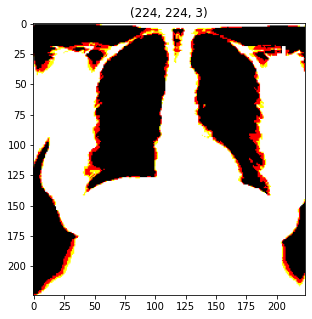

In [ ]:
# function call to plot the images 

plotImages(t_img, label)

In [ ]:
res = ResNet50( input_shape=(224,224,3), include_top= False) 

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in res.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [ ]:
x = Flatten()(res.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

# creating our model.
model = Model(res.input, x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_auc" , min_delta= 0.01, patience= 3, verbose=1, mode='max')
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_auc", verbose=1, save_best_only= True, mode='max')

In [ ]:
hist = model.fit_generator(train, steps_per_epoch= 10, 
                           epochs= 30, validation_data= valid, 
                           validation_steps= 16, callbacks=[es,mc])

<ipython-input-28-673b6a6f7538>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 2.3538 - auc: 0.8090
Epoch 1: val_auc improved from -inf to 0.89176, saving model to bestmodel.h5
10/10 [==============================] - 18s 520ms/step - loss: 2.3538 - auc: 0.8090 - val_loss: 1.3279 - val_auc: 0.8918
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 1.4041 - auc: 0.8892
Epoch 2: val_auc improved from 0.89176 to 0.94923, saving model to bestmodel.h5
10/10 [==============================] - 5s 482ms/step - loss: 1.4041 - auc: 0.8892 - val_loss: 0.7919 - val_auc: 0.9492
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.4827 - auc: 0.9610
Epoch 3: val_auc improved from 0.94923 to 0.95185, saving model to bestmodel.h5
10/10 [==============================] - 4s 467ms/step - loss: 0.4827 - auc: 0.9610 - val_loss: 0.6662 - val_auc: 0.9518
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.9055 - auc: 0.9280
Epoch 4: val_auc improved from 0.95185 to 0

In [ ]:
model.save("bestmodel.h5")

In [ ]:
from keras.models import load_model
model = load_model("bestmodel.h5")

In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])

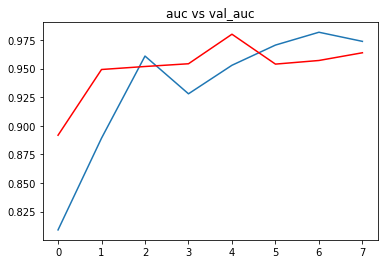

In [ ]:
plt.plot(h['auc'])
plt.plot(h['val_auc'] , c = "red")
plt.title("auc vs val_auc")
plt.show()

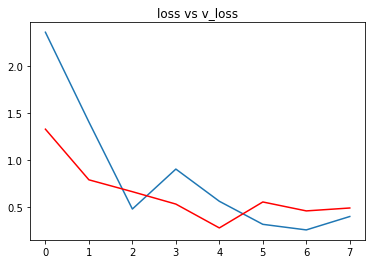

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v_loss")
plt.show()
     

In [ ]:
auc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {auc} %")

<ipython-input-34-53662ab90132>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  auc = model.evaluate_generator(generator= test)[1]


The accuracy of your model is = 0.9659357070922852 %


In [ ]:
from tensorflow.keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

1/1 [==============================] - 2s 2s/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 0s 29ms/step
The chances of image being Covid is : 99.36537742614746 percent

1/1 [==============================] - 0s 29ms/step
The chances of image being Normal is : 0.003065678902203217 percent


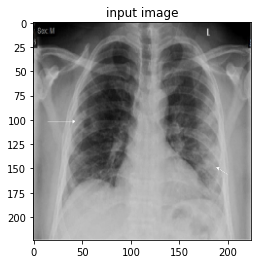

In [ ]:
path = "/content/drive/MyDrive/COVID_19/test_imgs/test_img.png"       #  add image path

img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")
  
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()